In [1]:
!pip install pycaret[full]

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
import pandas as pd
data=pd.read_csv('/content/gdrive/MyDrive/DM_Assignment3/IndianHouses.csv')
data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [4]:
from pycaret.regression import *

In [5]:
reg1 = setup(data, target='Price', session_id=42)

,Description,Value
0,Session id,42
1,Target,Price
2,Target type,Regression
3,Original data shape,"(1259, 11)"
4,Transformed data shape,"(1259, 13)"
5,Transformed train set shape,"(881, 13)"
6,Transformed test set shape,"(378, 13)"
7,Ordinal features,3
8,Numeric features,5
9,Categorical features,5


In [6]:
model_comparison = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,5292599.9593,149567742992402.3438,10940848.3085,0.7811,0.5082,0.4976,1.9330
gbr,Gradient Boosting Regressor,5618461.1960,151290149973480.2188,11274552.2459,0.7716,0.5267,0.5650,0.2590
xgboost,Extreme Gradient Boosting,5378270.3495,147908681929396.0625,11253168.6403,0.7666,0.4842,0.5000,0.1990
et,Extra Trees Regressor,5311072.2008,156030238135360.4375,11377566.6243,0.7645,0.4841,0.4703,0.5450
rf,Random Forest Regressor,5643623.4843,163036895518963.5625,11818938.9383,0.7434,0.5175,0.5630,0.5930
lightgbm,Light Gradient Boosting Machine,6025778.6129,161042154041653.6562,11879894.8899,0.7406,0.5339,0.5729,0.3510
ada,AdaBoost Regressor,8442338.5554,197152860276442.9062,13286317.7281,0.6830,0.8467,1.3015,0.3330
lr,Linear Regression,8118107.4518,222486403499878.4375,14183807.4068,0.6373,0.8135,0.8860,1.0300
lasso,Lasso Regression,8118107.0518,222486413383806.0000,14183807.7505,0.6373,0.8135,0.8860,0.2120
llar,Lasso Least Angle Regression,8118107.0458,222486410865921.7500,14183807.7127,0.6373,0.8135,0.8860,0.1980


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [7]:
ridge_model = create_model('ridge')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8230334.5727,186780610261043.6250,13666770.2937,0.5665,0.8764,0.9881
1,7969356.8314,123579050532578.5312,11116611.4681,0.7882,0.8386,0.8832
2,8414748.0389,172308619927259.0312,13126637.7998,0.4356,0.6725,0.9664
3,10208931.2659,535008302167487.5625,23130246.4787,0.5125,0.7865,0.9295
4,6773198.4686,108394331483386.7500,10411259.8413,0.7331,0.7292,0.6374
5,8913648.2669,514777471699846.9375,22688708.0218,0.4403,0.8719,0.7267
6,7915831.3715,158375044774659.3438,12584714.7276,0.7260,0.7181,0.9708
7,8665898.4071,208207635305103.0312,14429401.7653,0.6799,0.8462,0.9072
8,6477653.5877,80824504703708.1094,8990244.9746,0.8016,0.7837,0.8678


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [8]:
tuned_ridge = tune_model(ridge_model)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8313591.5826,188484835373910.1562,13728977.9435,0.5625,0.8796,1.0250
1,7924307.9037,124119727816308.1250,11140903.3663,0.7873,1.1964,0.8653
2,8415067.3379,178491756276086.7812,13360080.6987,0.4154,0.6800,0.9774
3,10254542.1645,536086001403214.5625,23153531.0785,0.5115,0.8296,0.9216
4,6585540.7394,104286400429479.3594,10212071.3095,0.7433,0.6200,0.6303
5,8572229.7130,501043137161514.6250,22383992.8780,0.4553,0.7852,0.6854
6,7817198.4967,154410463066117.3750,12426200.6690,0.7329,0.7609,0.9359
7,8599739.7390,207366465036603.3750,14400224.4787,0.6812,0.8940,0.9066
8,6346196.3171,78180199776402.5625,8841956.7844,0.8081,0.7051,0.8296


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


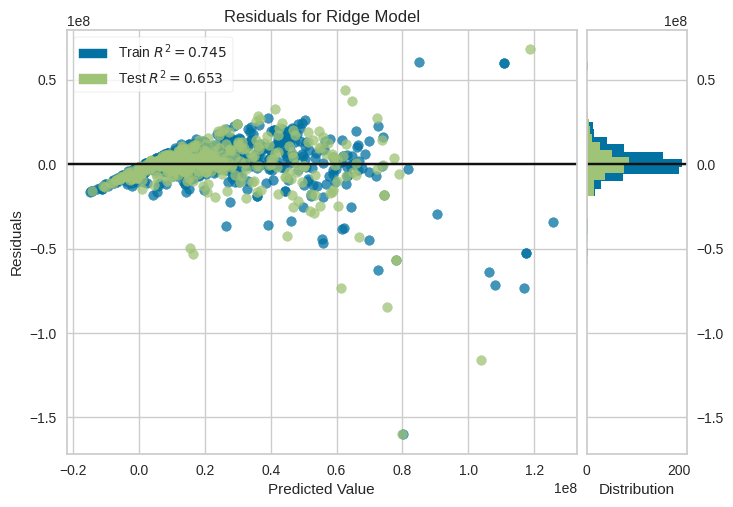

In [9]:
plot_model(tuned_ridge, plot='residuals')

In [10]:
evaluate_model(tuned_ridge)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [11]:
final_model = finalize_model(tuned_ridge)

In [12]:
data_copy = data.copy()
data_copy.drop('Price', axis=1, inplace=True)
data_copy.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,Ready_to_move,New_Property,Builder_Floor,6667.0


In [13]:
prediction = predict_model(final_model, data = data_copy)
prediction.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Status,Transaction,Type,Per_Sqft,prediction_label
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,Ready_to_move,New_Property,Builder_Floor,NaN,1.161329e+07
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,Ready_to_move,New_Property,Apartment,6667.0,-9.433384e+05
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,Ready_to_move,Resale,Apartment,6667.0,1.147427e+07
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,Ready_to_move,Resale,Builder_Floor,6667.0,4.190715e+06
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,Ready_to_move,New_Property,Builder_Floor,6667.0,1.005338e+07
